<a href="https://colab.research.google.com/github/BigTuna666/Wine-Quality-Prediction/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
path = '/content/WineQT.csv'
df = pd.read_csv(path)
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1053,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.800000,5,1476
344,9.3,0.39,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.200000,6,489
720,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.500000,7,1024
997,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.700000,6,1404
732,6.4,0.39,0.33,3.3,0.046,12.0,53.0,0.99294,3.36,0.62,12.200000,6,1044
496,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.800000,6,699
1000,8.1,0.29,0.36,2.2,0.048,35.0,53.0,0.99500,3.27,1.01,12.400000,7,1408
625,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.400000,6,886
1081,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6,1514
335,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.200000,5,475


In [ ]:
pd.unique(df.quality)

array([5, 6, 7, 4, 8, 3])

In [ ]:
X = df.drop(['quality','Id'], axis = 'columns')
y = df.quality

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state = 2)

In [ ]:
len(X_test)

458

In [ ]:
len(X_train)

685

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 6000)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6000)

In [ ]:
model.score(X_test, y_test)

0.6419213973799127

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=200, max_iter=350, tol=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=200, max_iter=350, tol=0.1)

In [ ]:
model.score(X_test, y_test)

0.851528384279476

In [ ]:
model.score(X_train, y_train)

0.8598540145985402

In [ ]:
model.predict([['7.8','0.58','0.02','2','0.073','9','18','0.9968','3.36','0.57','9.4']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([7])

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cmt = confusion_matrix(y_test, y_predicted) 
cmt

array([[  1,   0,   0,   0,   0,   0],
       [  0,   9,   6,   3,   0,   0],
       [  0,   0, 181,  16,   1,   0],
       [  0,   0,  19, 152,   5,   0],
       [  0,   0,   0,  15,  42,   1],
       [  0,   0,   0,   2,   0,   5]])

Text(69.0, 0.5, 'truth')

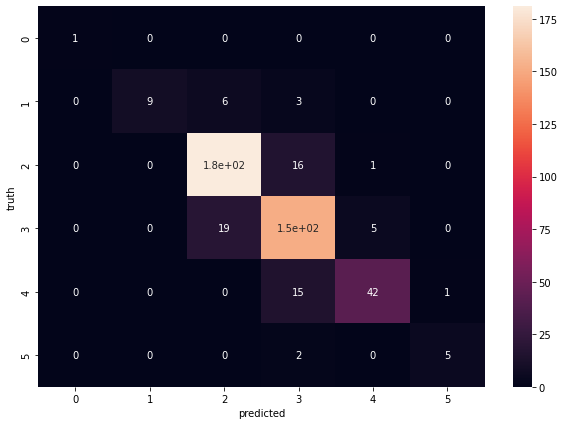

In [ ]:
import seaborn as snb
plt.figure(figsize = (10,7))
snb.heatmap(cmt,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [75]:
import pickle

In [76]:
with open('model_pickle','wb') as f:
  pickle.dump(model,f)

In [77]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [78]:
mp.predict([['7.8','0.58','0.02','2','0.073','9','18','0.9968','3.36','0.57','9.4']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([7])